### Solutions to exercises at the end of Chapter 5 Predictive Modeling

### Exercise: Linear regression with a single predictor variable

Part a)

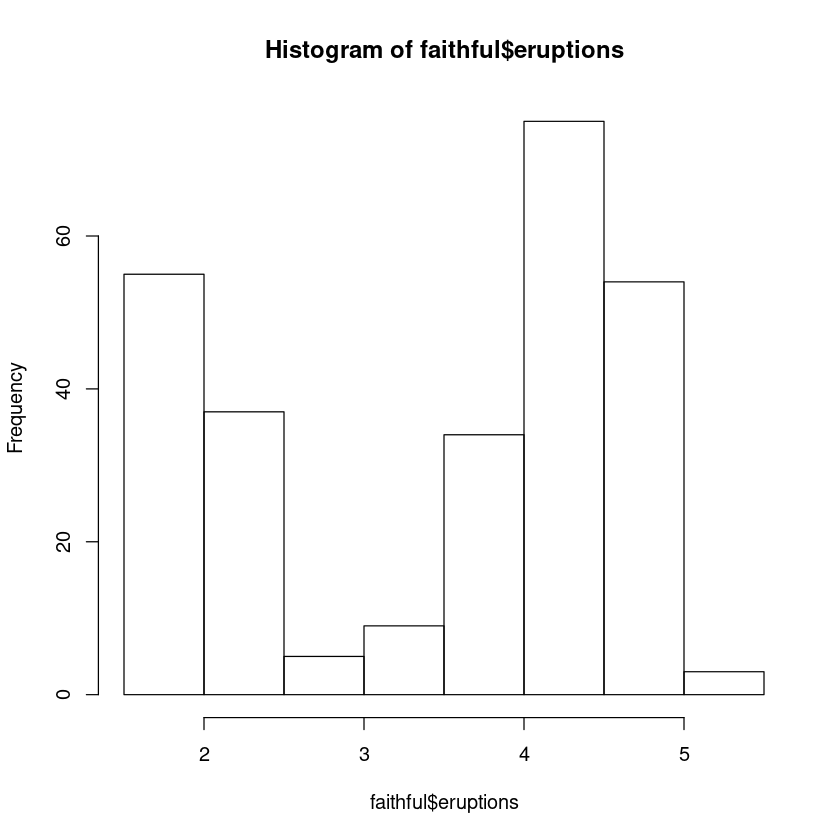

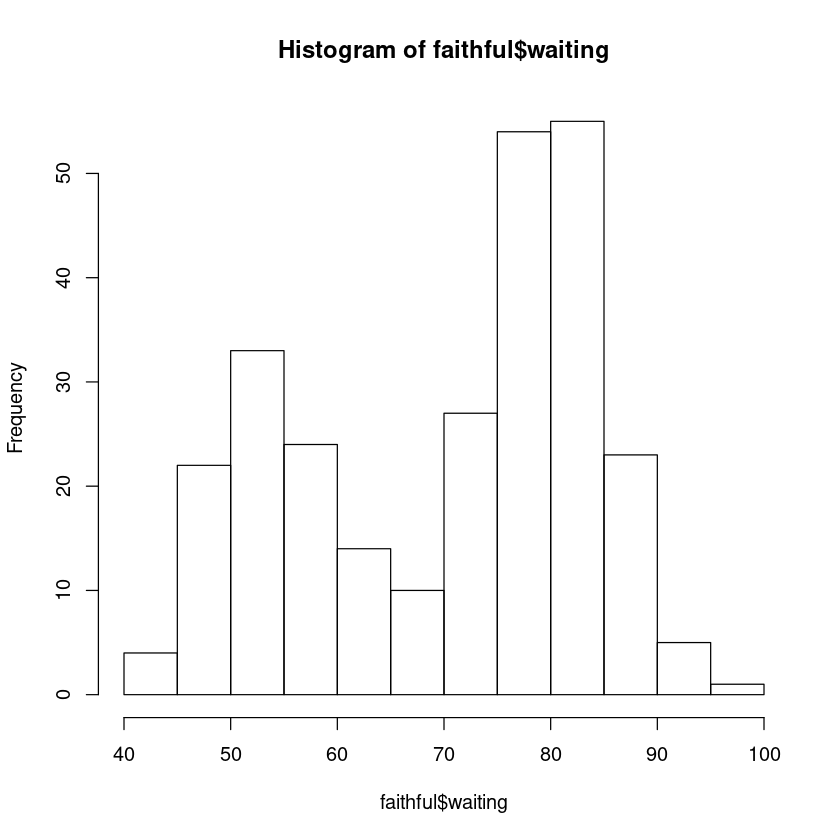

In [7]:
hist(faithful$eruptions)
hist(faithful$waiting)

Part b)

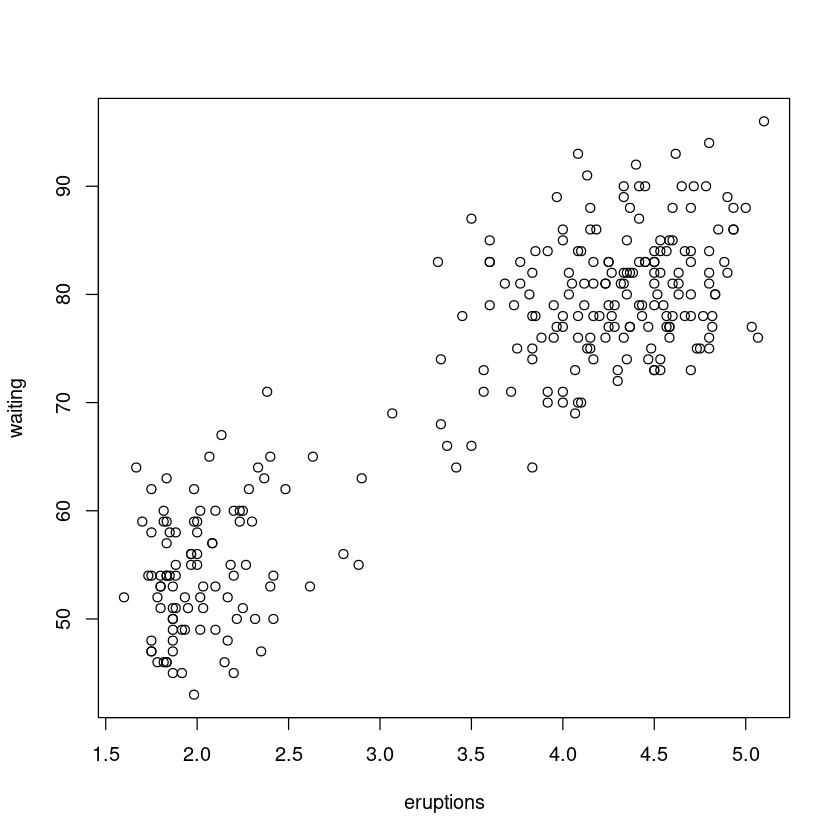

In [8]:
with(faithful, plot(eruptions, waiting))

For part c), it appears that there are two types of eruptions, those of shorter
  duration and those of longer duration. Eruptions of short duration are followed
  by short waiting times until the next eruption. Eruptions of long duration
  are followed by long waiting times.

Part d)

In [10]:
fm <- lm(waiting ~ eruptions, data=faithful)
summary(fm)


Call:
lm(formula = waiting ~ eruptions, data = faithful)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0796  -4.4831   0.2122   3.9246  15.9719 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.4744     1.1549   28.98   <2e-16 ***
eruptions    10.7296     0.3148   34.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.914 on 270 degrees of freedom
Multiple R-squared:  0.8115,	Adjusted R-squared:  0.8108 
F-statistic:  1162 on 1 and 270 DF,  p-value: < 2.2e-16


  Part i) The intercept $\beta_0 = 33.47$ represents the average
  waiting time (until the next eruption) just after observing an
  eruption of zero minutes in duration. So, it's not really all that
  meaningful.

  Part ii) The coefficient on duration $\beta_1 = 10.7$ represents
  the average effect on waiting time for a one--minute increase in
  duration. In other words, for every minute of duration of an eruption,
  you will have to wait an additional 10.7 minutes until the next eruption
  (or long eruptions are followed by long waiting times).

  Part iii) The predicted waiting time is
  
  $ \beta_0 + \beta_14 = 33.47 + 10.73 \times 4 = 76.4~\text{minutes} $ 
  
  Regarding the uncertainty in the
  prediction, you can either 1) look at the scatter plot right around
  the duration value of 4 minutes and see that the range is about 25
  minutes, or 2) look at the residual standard error from the summary
  of the fitted model. It shows that $\sigma = 5.9$. We know that the
  observations should be within about 3 standard errors of the mean,
  the range would be $\pm 5.9\times 3 = \pm16.8$, or a range of about 32. So a prediction between about 20 and 35 minutes is reasonable. The idea of this exercise is that
  a prediction represents a point estimate and that there is
  uncertainty in that estimate.


### Exercise: Using linear regression to summarize a data set

In [5]:
require(tidyverse)

wine <- read.csv("../data/Wine.csv")    # read in data

fm <- lm(Price ~ AGST + WinterRain + HarvestRain + Age,
         data = wine)
summary(fm)



Call:
lm(formula = Price ~ AGST + WinterRain + HarvestRain + Age, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45470 -0.24273  0.00752  0.19773  0.53637 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.4299802  1.7658975  -1.942 0.066311 .  
AGST         0.6072093  0.0987022   6.152  5.2e-06 ***
WinterRain   0.0010755  0.0005073   2.120 0.046694 *  
HarvestRain -0.0039715  0.0008538  -4.652 0.000154 ***
Age          0.0239308  0.0080969   2.956 0.007819 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.295 on 20 degrees of freedom
Multiple R-squared:  0.8286,	Adjusted R-squared:  0.7943 
F-statistic: 24.17 on 4 and 20 DF,  p-value: 2.036e-07


For part a), the intercept represents the average price when AGST, WinterRain, HarvestRain, and Age are all equal to zero. If all predictor variables are zero then there would be no wine to sell, so the intercept by itself is not meaningful.

Part b)

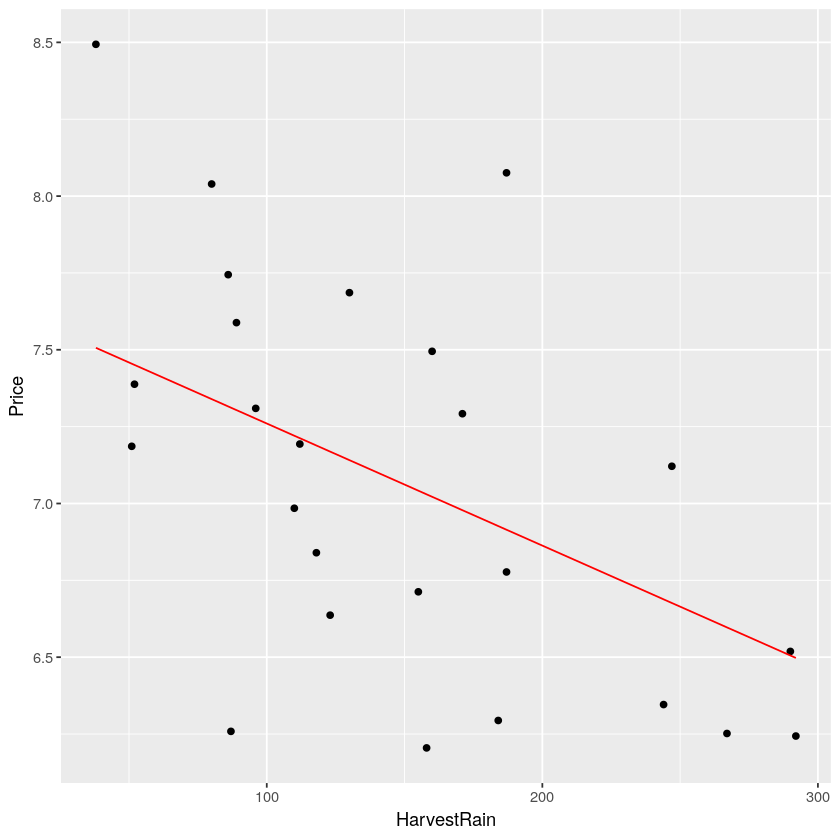

In [6]:
beta0 <- coef(fm)[1]
beta1 <- coef(fm)[2] # AGST
beta2 <- coef(fm)[3] # WinterRain
beta3 <- coef(fm)[4] # HarvestRain
beta4 <- coef(fm)[5] # Age

wine$Price2 <- beta0 +
    beta1*mean(wine$AGST) +
    beta2*mean(wine$WinterRain) +
    beta3*wine$HarvestRain +
    beta4*mean(wine$Age)

ggplot(wine) +
    geom_point(aes(x=HarvestRain, Price)) +
    geom_line(aes(x=HarvestRain, Price2), color="red")


For part c), a wine-maker would like to see rain during Winter and not during Harvest.

Part d)

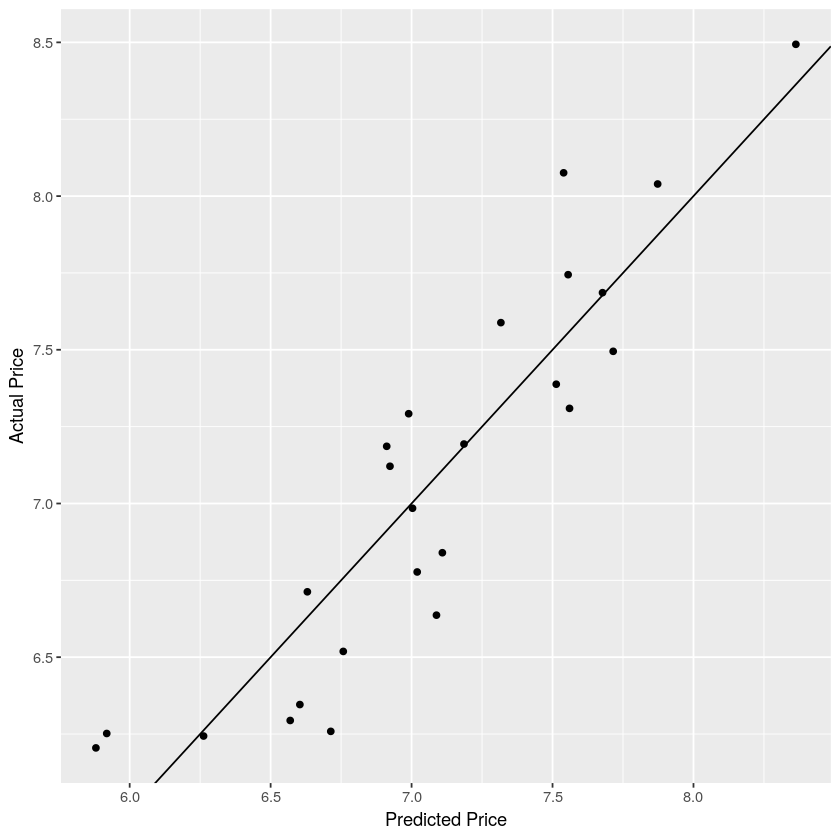

In [7]:
## plot actual price vs predicted price
wine$fit <- predict(fm)

ggplot(wine) +
    geom_point(aes(x=fit, y=Price)) +
    geom_abline() +
    labs(x="Predicted Price", y="Actual Price")


Part e)

In [8]:
## compute the residual std error by hand
n <- nrow(wine)
dof <- nrow(wine) - length(coef(fm))
sqrt( sum( (wine$Price - predict(fm))^2 )/dof )


[1] 0.2949714

Part f) I think that a linear model is appropriate for this data. I see no patterns in the residuals from part d.